In [64]:
print("Loading vix_utils into a jupyter notebook, and plotting some term structures")

Loading vix_utils into a jupyter notebook, and plotting some term structures


In [27]:
import vix_utils, pandas as pd, logging, asyncio,sys,matplotlib.pyplot as plt, scipy.stats as bc

In [65]:
#in Jupyter, use the vix_utils asynchronous functions to the load the data
#here we read the futures and cash term structure

vix_futures,vix_cash=await asyncio.gather(vix_utils.async_load_vix_term_structure(),vix_utils.async_get_vix_index_histories())


In [51]:
#another way, reading the futures, then the cash structure, in sequence instead of concurrently
vix_futures_skinny_2 = await vix_utils.async_load_vix_term_structure()
vix_cash_2=await vix_utils.async_get_vix_index_histories()

In [61]:
    #manipulate the data to get what we want to display
    vix_cash_wide=vix_utils.pivot_cash_term_structure_on_symbol(vix_cash)
    vix_futures_monthly_skinny=vix_utils.select_monthly_futures(vix_futures)
    vix_futures_wide=vix_utils.pivot_futures_on_monthly_tenor(vix_futures_monthly_skinny)
    #we just want 9 tenors for now
    selected_tenors=list(range(1,10))
    original_vix_futures_wide=pd.DataFrame(vix_futures_wide)
    vix_futures_wide=vix_futures_wide[selected_tenors]
    close=vix_futures_wide.swaplevel(0,1,axis=1)[["Close"]]


<Axes: xlabel='Trade Date'>

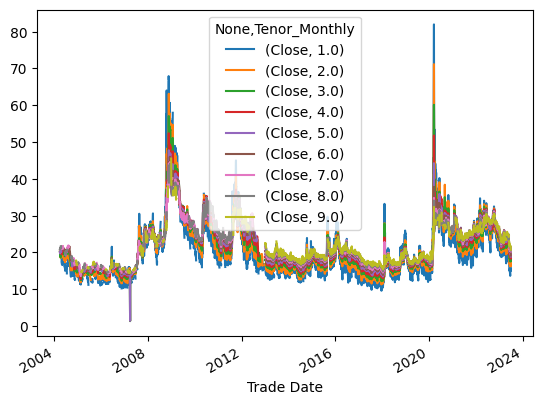

In [66]:
#plot futures
close.plot()

<Axes: xlabel='Trade Date'>

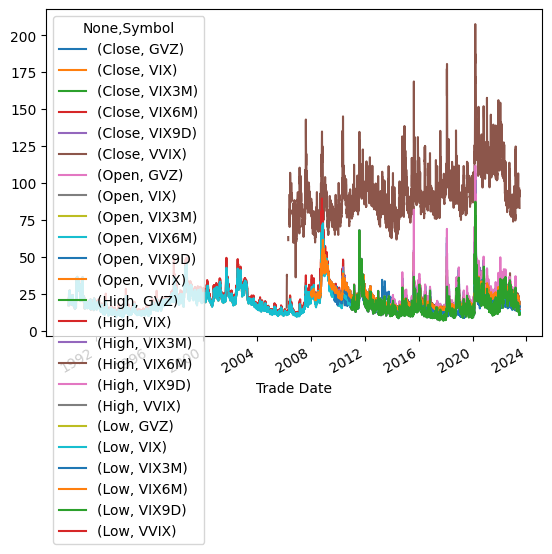

In [63]:
vix_cash_wide.plot()